Link to the data: https://www.kaggle.com/datasets/thedevastator/booking-com-hotel-reviews

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('booking_reviews.csv')

In [ ]:
data.head()

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


**Missing data:**

In [ ]:
data.isnull().sum()

index                  0
review_title           1
reviewed_at          105
reviewed_by          105
images             25737
crawled_at           289
url                  289
hotel_name           289
hotel_url            289
avg_rating           289
nationality          305
rating               289
review_text          289
raw_review_text      473
tags                 473
meta                 473
dtype: int64

In [ ]:
null_percentage = data['rating'].isnull().mean() * 100
print(f"Percentage of null embeddings: {null_percentage:.2f}%")

Percentage of null embeddings: 1.08%


It can be seen that the rows with missing data in the review_text column are the same rows that are missing in the rating column. Since these are the columns that are important to us for creating the prediction model, we chose to remove them because they do not contribute (~ 1% from the data)

In [ ]:
data = data.dropna(subset=['rating'])
data.isnull().sum()

index                  0
review_title           1
reviewed_at            0
reviewed_by            0
images             25632
crawled_at             0
url                    0
hotel_name             0
hotel_url              0
avg_rating             0
nationality           16
rating                 0
review_text            0
raw_review_text      184
tags                 184
meta                 184
dtype: int64

We will check if missing data can be found using a repeating pattern of reviews:

In [ ]:
# Count the occurrences of each unique review text
review_counts = data['review_text'].value_counts()

# Filter out reviews that appear more than once
common_reviews = review_counts[review_counts > 1]
common_reviews

review_text
There are no comments available for this review    7687
Location                                             29
Nothing,\n\nEverything                               27
Everything                                           20
Nothing ,\n\nEverything                              12
                                                   ... 
Nothing,\n\nGreat location                            2
Excellent location                                    2
Everything.                                           2
Excellent breakfast.                                  2
Room                                                  2
Name: count, Length: 70, dtype: int64

Problem Identified:

In the dataset, a significant number of reviews contained the generic message "There are no comments available for this review" in the review_text column. This posed a challenge as these generic messages provided no useful information for predicting the ratings.

In [ ]:
# Filter the reviews that contain "There are no comments available for this review"
df_filtered = data[data['review_text'] == "There are no comments available for this review"]

# Group by review_title and calculate the average rating for each title
title_rating_relationship = df_filtered.groupby('review_title')['rating'].mean().reset_index()
title_rating_relationship



,review_title,rating
0,"""hotel"" without shampoo, hair dryer and stable...",4.0
1,2 Nites Stay with Children. Well located if ha...,7.5
2,"A beautiful apartment, exquisite furnishings, ...",10.0
3,A bit disappointing versus the price and other...,5.4
4,A charming little hotel with a perfect locatio...,9.0
...,...,...
449,very good tghanks,10.0
450,very nice,7.9
451,very unique,8.8
452,very well located and good hotel in general,7.0


Solution Implemented:

To address this issue, we replaced the review_text with the corresponding review_title for entries with the generic message. This approach ensures that we utilize all available data and maintain the integrity of the dataset, as review titles often provide useful insights even in the absence of detailed review text.

In [ ]:
# Replace the generic message with the review title
data_final = data.copy()
generic_message = "There are no comments available for this review"
data_final.loc[data_final['review_text'] == generic_message, 'review_text'] = data_final['review_title']

Additional Note:
We did not use the review title for entries where the review_text was not the generic message. This was done to maintain compatibility with the project requirements, which focus solely on positive and negative reviews.

**Exploratory Analysis:**

In [ ]:
data_final.describe()["rating"]

count    26386.000000
mean         8.560669
std          1.566554
min          1.000000
25%          7.900000
50%          9.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [ ]:
print(f'mean rating:{data_final["rating"].mean()}')
print(f'std rating:{data_final["rating"].std()}')

mean rating:8.560668536345032
std rating:1.5665535076243322


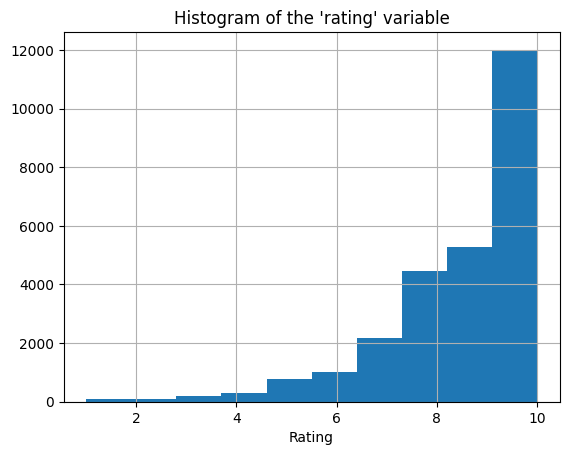

In [ ]:
from matplotlib import pyplot as plt

data_final.rating.hist()
plt.title("Histogram of the 'rating' variable")
plt.xlabel("Rating")
plt.show()

**Data preprocessing:**

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Ensure the model is in evaluation mode
model.eval()

# Check if CUDA is available for GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embedding(text):
  try:
    # Encode the text to BERT's format
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512).to(device)

    # Compute the embedding
    with torch.no_grad():
      output = model(**encoded_input)

    # Extract the embeddings from the [CLS] token
    embedding = output.last_hidden_state[:, 0, :].cpu().numpy()
    return embedding.flatten()
  except Exception as e:
    print(f"Error processing text: {e}")
    return None


In [ ]:
# Apply the embedding function to the review text column
data_final['bert_embedding'] = data_final['review_text'].apply(get_bert_embedding)

In [ ]:
# data_final.to_pickle('data_with_embeddings.pkl')  # Save as a pickle to preserve the list format in cells
# data_final = pd.read_pickle('data_with_embeddings.pkl')

**Model selection:**

In [ ]:
data_final = data_final[["bert_embedding", "rating"]]
data_final.head()

,bert_embedding,rating
0,"[-0.09387736, -0.15994042, 0.08085465, 0.11053...",10.0
1,"[-0.33747697, 0.016115446, 0.04819362, -0.0840...",9.0
2,"[-0.2941426, -0.2649982, 0.4205667, 0.03265588...",10.0
3,"[-0.19244793, 0.16835201, 0.42944482, -0.14472...",10.0
4,"[-0.039262086, -0.3201888, 0.17829743, -0.0988...",9.2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Stack embeddings into a numpy array
X = np.vstack(data_final['bert_embedding'].values)
y = data_final['rating'].values

# Apply PCA to reduce the dimensionality of embeddings
pca = PCA(n_components=36)
X_reduced = pca.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize models
models = {
  'Linear Regression': LinearRegression(),
  'Random Forest': RandomForestRegressor(),
  'SVM': SVR(),
  'LightGBM': lgb.LGBMRegressor()
}

# Define hyperparameter grids
param_grids = {
  'Linear Regression': {},
  'Random Forest': {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
  },
  'SVM': {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
  },
  'LightGBM': {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
  }
}

# Train and evaluate models with hyperparameter tuning
results = {}
for name, model in models.items():
  print(name)
  if param_grids[name]:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
  else:
    best_model = model
    best_model.fit(X_train, y_train)

  y_pred = best_model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'Best Parameters': grid_search.best_params_ if param_grids[name] else 'Default', 'MSE': mse, 'R2': r2}

Linear Regression
Random Forest
SVM
LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 16886, number of used features: 36
[LightGBM] [Info] Start training from score 8.559878
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 16886, number of used features: 36
[LightGBM] [Info] Start training from score 8.551552
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 16886, number of 

In [ ]:
# Neural Network Definition and Training
class RegressionNN(nn.Module):
  def __init__(self, input_dim, hidden_layers, hidden_units):
    super(RegressionNN, self).__init__()
    layers = []
    for i in range(hidden_layers):
      layers.append(nn.Linear(input_dim if i == 0 else hidden_units, hidden_units))
      layers.append(nn.ReLU())
    layers.append(nn.Linear(hidden_units, 1))
    self.network = nn.Sequential(*layers)

  def forward(self, x):
      return self.network(x)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Hyperparameter tuning for Neural Network
nn_params = {
  'hidden_layers': [2, 3],
  'hidden_units': [50, 100],
  'learning_rate': [0.001, 0.01]
}

best_mse = float('inf')
best_r2 = None
best_params = {}

for hidden_layers in nn_params['hidden_layers']:
  for hidden_units in nn_params['hidden_units']:
    for learning_rate in nn_params['learning_rate']:
      # Initialize the neural network
      input_dim = X_train.shape[1]
      nn_model = RegressionNN(input_dim, hidden_layers, hidden_units)

      # Define loss function and optimizer
      criterion = nn.MSELoss()
      optimizer = optim.Adam(nn_model.parameters(), lr=learning_rate)

      # Train the neural network
      num_epochs = 100
      for epoch in range(num_epochs):
        nn_model.train()
        optimizer.zero_grad()
        outputs = nn_model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

      # Evaluate the neural network
      nn_model.eval()
      with torch.no_grad():
        y_pred_nn = nn_model(X_test_tensor).numpy()
        mse_nn = mean_squared_error(y_test, y_pred_nn)
        r2_nn = r2_score(y_test, y_pred_nn)

        if mse_nn < best_mse:
          best_mse = mse_nn
          best_r2 = r2_nn
          best_params = {
            'hidden_layers': hidden_layers,
            'hidden_units': hidden_units,
            'learning_rate': learning_rate
          }

results['Neural Network'] = {'Best Parameters': best_params, 'MSE': best_mse, 'R2': best_r2}

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
pd.set_option('display.max_colwidth', None)
results_df

,Best Parameters,MSE,R2
Linear Regression,Default,1.425957,0.431506
Random Forest,"{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}",1.231829,0.5089
SVM,"{'C': 1, 'epsilon': 0.1}",1.194,0.523982
LightGBM,"{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 50}",1.177824,0.53043
Neural Network,"{'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}",1.35206,0.460967


**Summary of Model Selection:**

We evaluated several regression models to predict ratings based on review text embeddings. The models used were **Linear Regression**, **Random Forest**, **SVM** for regression, **LightGBM**, and a manually defined **Neural Network**.

To handle overfitting, we:

- Reduced the dimensionality of BERT embeddings using PCA (we reduced it to dimension 36, similar to the dimension in the project).

- Split the data into training and testing sets.

- Performed hyperparameter tuning using GridSearchCV with cross-validation
  for all models except the neural network, which was manually tuned.

Performance was assessed using Mean Squared Error (MSE) and R-squared (R²).

Based on the given performance dataframe, **LightGBM is the best model** to choose for predicting ratings based on the review text embeddings. It has the lowest prediction error(MSE) and explains the most variance in the data(R2).

In [ ]:
import pickle

# Best parameters for LightGBM from the tuning results
best_params = {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 50}

# Train the final LightGBM model with the best parameters
final_model = lgb.LGBMRegressor(**best_params)
final_model.fit(X_train, y_train)

# Save the final model as a .pkl file
model_filename_pkl = 'final_lightgbm_model.pkl'
with open(model_filename_pkl, 'wb') as file:
    pickle.dump(final_model, file)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 21108, number of used features: 36
[LightGBM] [Info] Start training from score 8.556026


**Visualization:**

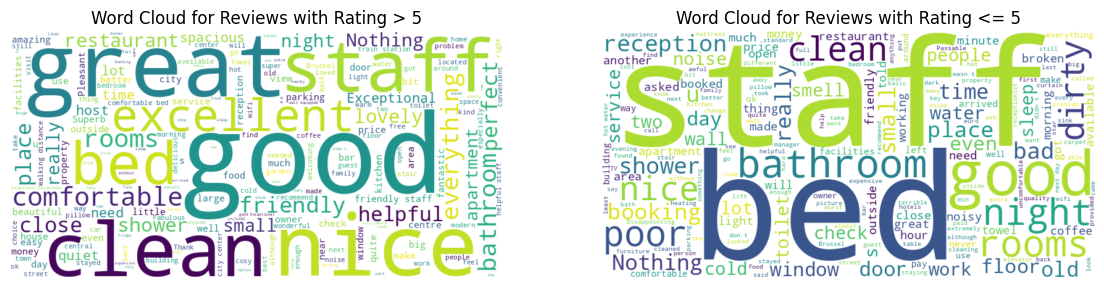

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Separate reviews with ratings greater than 5 and those with ratings 5 or lower
reviews_high_rating = data_final[data_final['rating'] > 5]['review_text']
reviews_low_rating = data_final[data_final['rating'] <= 5]['review_text']

# Define stopwords
stopwords = set(STOPWORDS)
custom_stopwords = {'one', 'hotel', 'stay', 'room', 'breakfast', 'location'}
stopwords.update(custom_stopwords)

# Generate word clouds for both categories with stopwords excluded
wordcloud_high = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(reviews_high_rating))
wordcloud_low = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(' '.join(reviews_low_rating))

# Plot the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.title('Word Cloud for Reviews with Rating > 5')
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Word Cloud for Reviews with Rating <= 5')
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')

plt.show()




---



**Preparing the data from the project:**

In [ ]:
!git clone https://github.com/eilamshapira/HumanChoicePrediction.git


fatal: destination path 'HumanChoicePrediction' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import os

folder_path = '/content/HumanChoicePrediction/data/game_reviews'

# Initialize an empty list to hold the dataframes
dataframes = []

# Iterate over all files in the directory
for filename in os.listdir(folder_path):
  # Construct the full file path
  file_path = os.path.join(folder_path, filename)

  # Read the CSV file into a dataframe, skipping the first row
  df = pd.read_csv(file_path, header=None)

  # Append the dataframe to the list
  dataframes.append(df)

# Concatenate all dataframes into a single dataframe
hotels_df = pd.concat(dataframes, ignore_index=True)

# Assign column names (based on the image provided)
hotels_df.columns = ['review_number', 'hotel_name', 'positive_review', 'negative_review', 'score']




In [ ]:
# Define a function to merge positive and negative reviews
def merge_reviews(row):
    if pd.isnull(row['positive_review']) and pd.isnull(row['negative_review']):
        return None
    elif pd.isnull(row['positive_review']):
        return row['negative_review']
    elif pd.isnull(row['negative_review']):
        return row['positive_review']
    else:
        # According to the model we trained on, first the negative review appeared and then the positive
        return row['negative_review'] + ". " + row['positive_review'] + "."

# Apply the function to create a new merged column
hotels_df['merged_review'] = hotels_df.apply(merge_reviews, axis=1)


In [ ]:
# Fill null values in merged_review with "No Review"
hotels_df['merged_review'].fillna('No review', inplace=True)

In [ ]:
# Apply the embedding function to the review text column
hotels_df['bert_embedding'] = hotels_df['merged_review'].apply(get_bert_embedding)

In [ ]:
# # Load the saved model
# with open('final_lightgbm_model.pkl', 'rb') as file:
#     final_model = pickle.load(file)

# Stack embeddings into a numpy array
X_new = np.vstack(hotels_df['bert_embedding'].values)

# Apply the same PCA transformation
X_new_reduced = pca.transform(X_new)

# Predict the ratings
hotels_df['predicted_rating'] = final_model.predict(X_new_reduced)

baseline_df = hotels_df[['review_number', 'score', 'merged_review', 'bert_embedding', 'predicted_rating']]

In [ ]:
# baseline_df.to_pickle('baseline_ratings.pkl')  # Save as a pickle
# baseline_df = pd.read_pickle('baseline_ratings.pkl')  # Adjust path as necessary

create new baseline file

In [ ]:
# Convert the dataframe to a dictionary
# review_number_to_predicted_rating = dict(zip(baseline_df['review_number'], baseline_df['predicted_rating']))
review_number_to_predicted_rating = dict(zip(baseline_df['hotel_number'], baseline_df['predicted_rating']))

# Save the dictionary to a file in the desired format
output_file_path = 'baseline.txt'
with open(output_file_path, 'w') as f:
    f.write("{\n")
    for key, value in review_number_to_predicted_rating.items():
        f.write(f'    "{key}": {value},\n')
    f.write("}\n")

output_file_path

'baseline.txt'